In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

from tangle import Tangle

plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

Draw tangle of 100 transaction using Uniform random tip selection

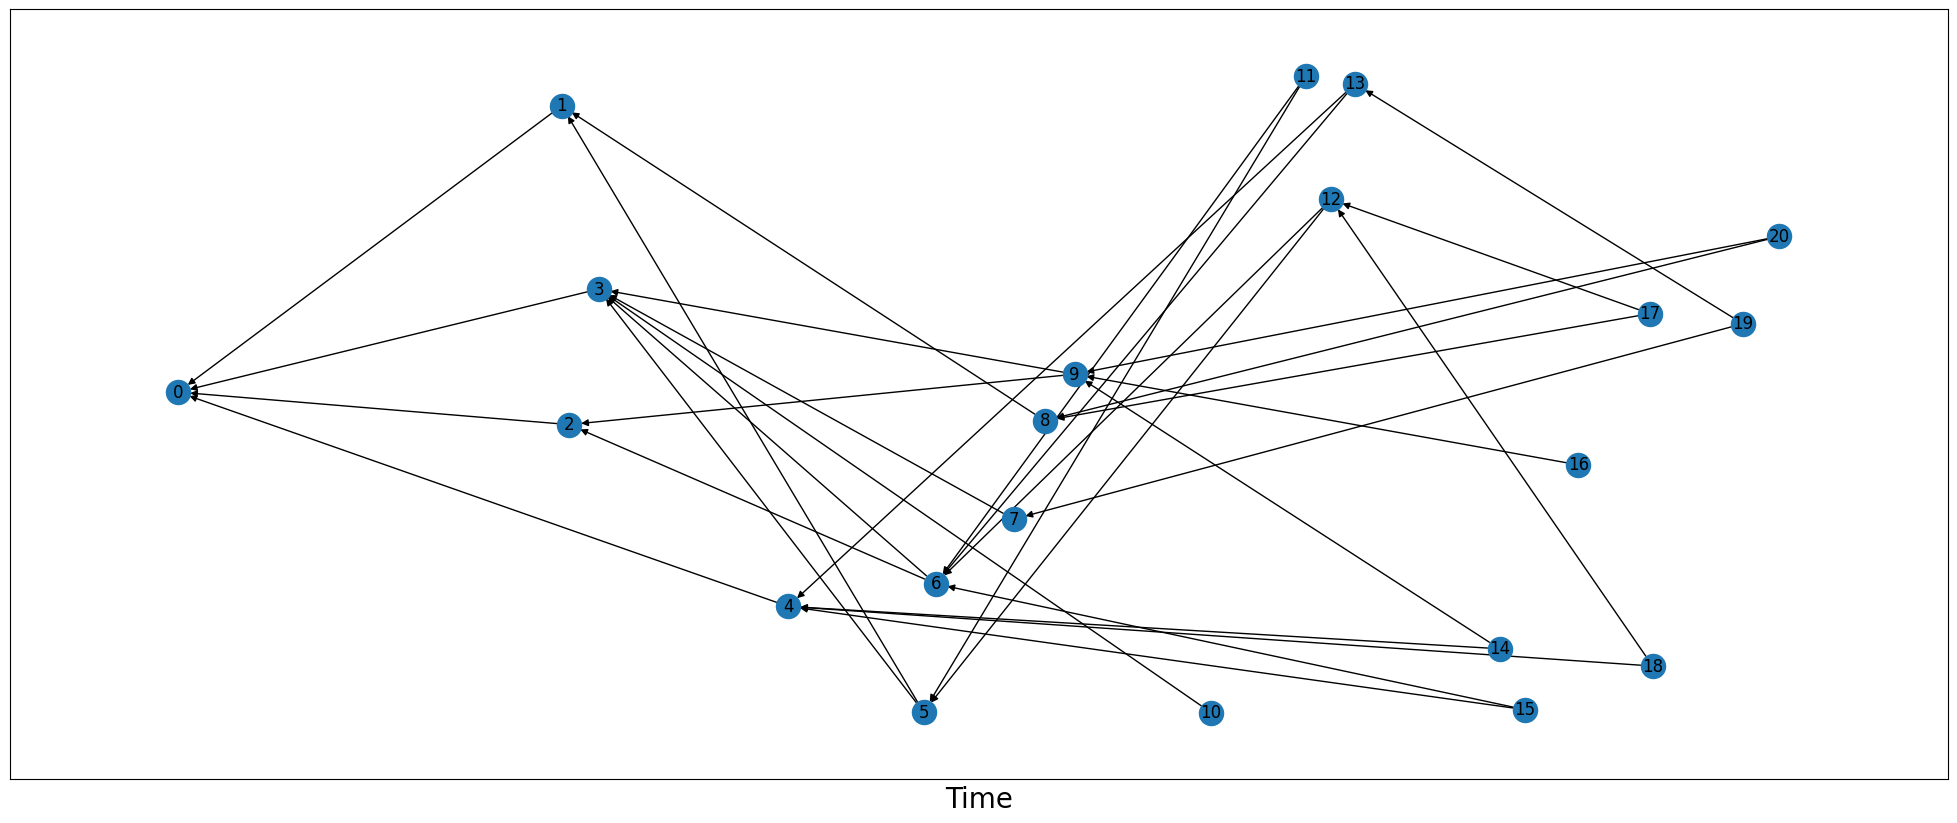

In [3]:
plt.figure(figsize=(25, 10))

t = Tangle(rate=3, tip_selection='mcmc', plot=True)
for i in range(20):
    t.next_transaction()

t.plot()

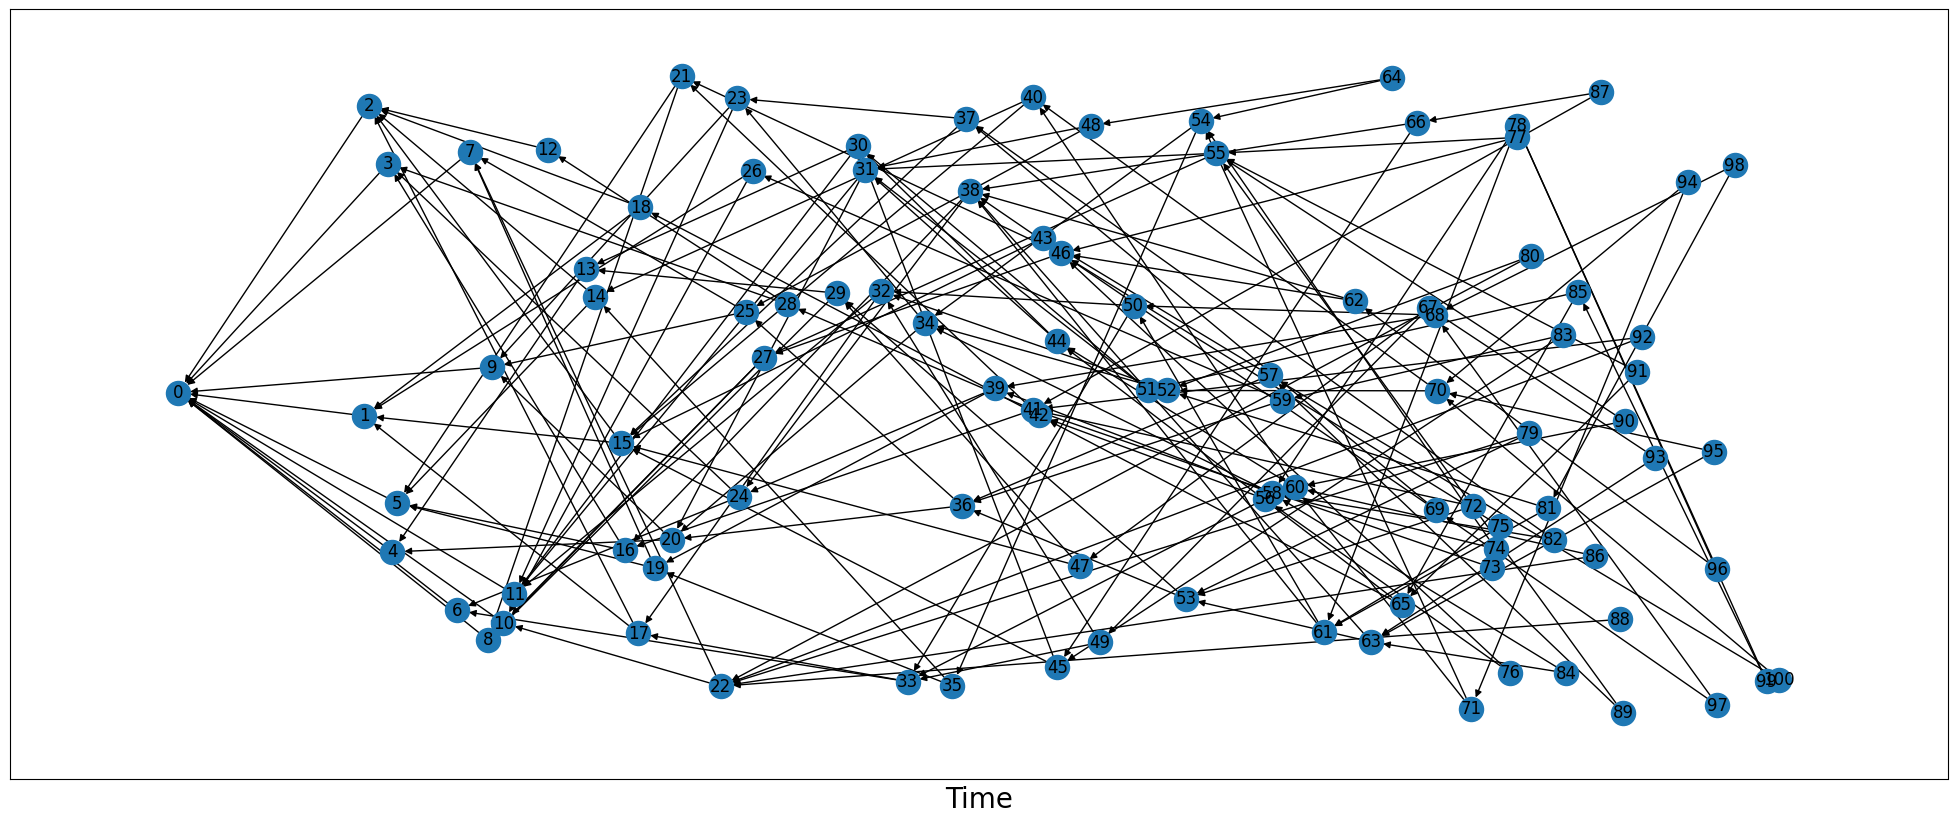

In [4]:
plt.figure(figsize=(25, 10))

t = Tangle(rate=10, tip_selection='urts', plot=True)
for i in range(100):
    t.next_transaction()

t.plot()

Draw tangle of 100 transaction using Weighted random walk, $\alpha = 0.001$

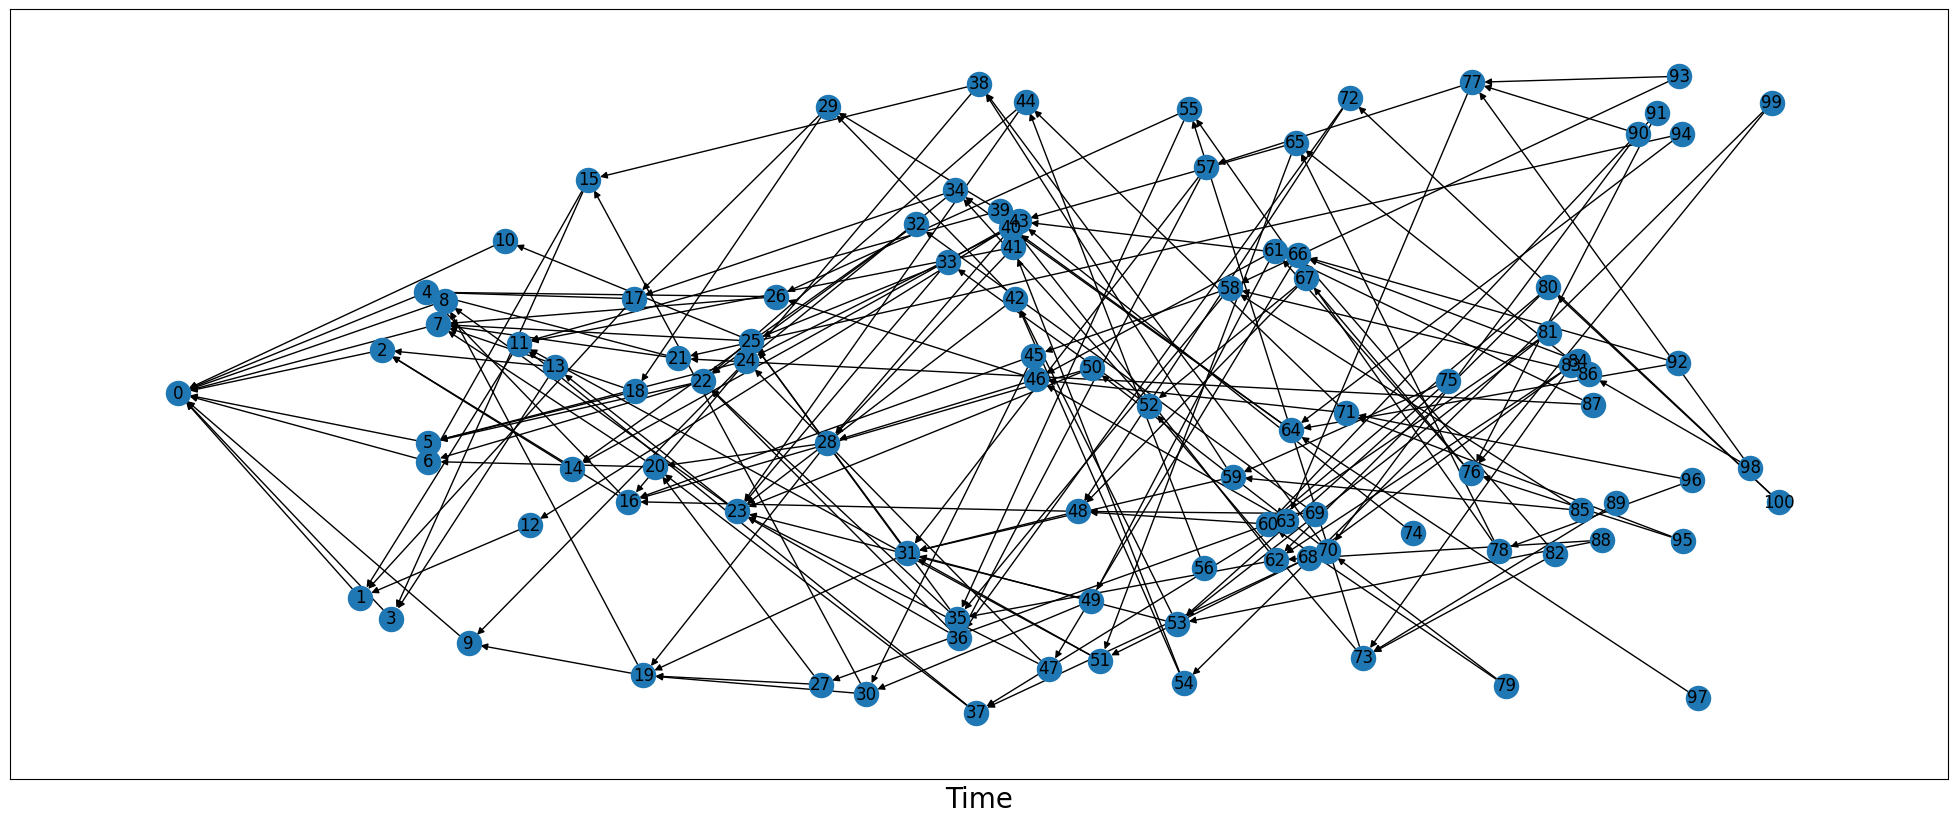

In [5]:
plt.figure(figsize=(25, 10))

t = Tangle(rate=10, tip_selection='mcmc', plot=True)
for i in range(100):
    t.next_transaction()

t.plot()

Plot cumulative weigth of 200<sup>th</sup> transaction, URTS, $\lambda = 50$

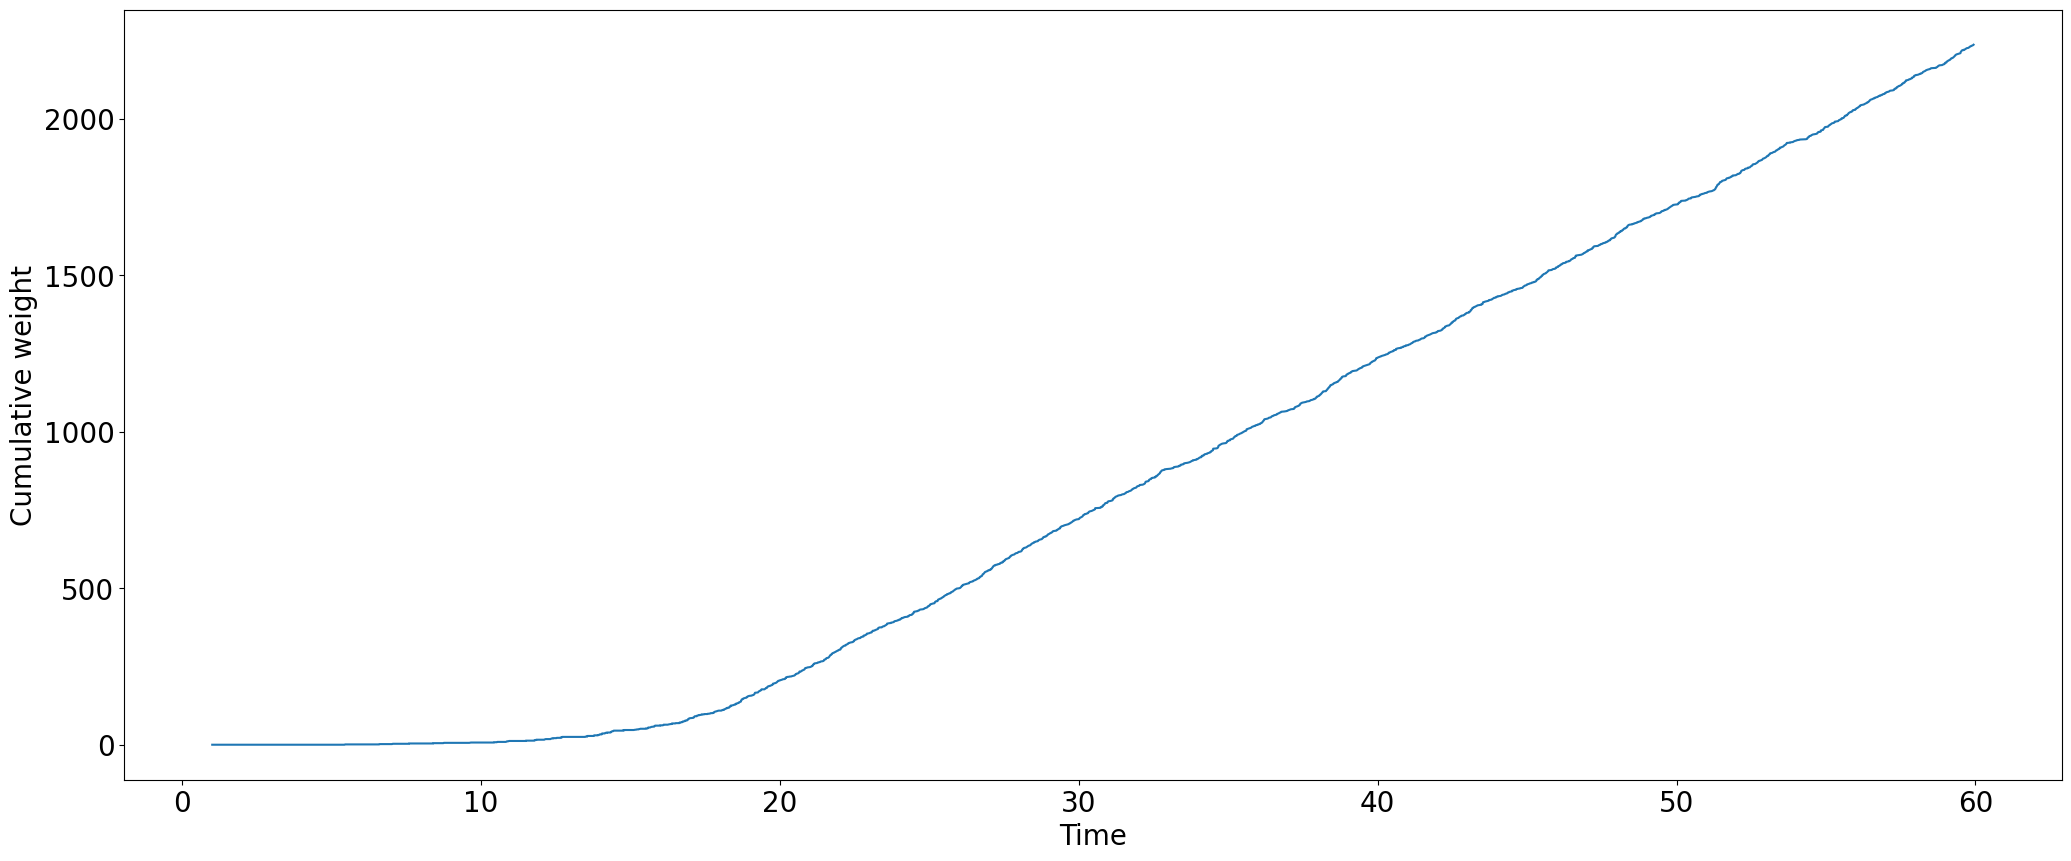

In [4]:
plt.figure(figsize=(25, 10))
t = Tangle(rate=50, tip_selection='urts')

cw_200 = []

for i in range(3000):
    t.next_transaction()

    if i > 200:
        cw_200.append([t.time, t.transactions[200].cumulative_weight()])
    else:
        cw_200.append([t.time, 0])
        
cw_200 = np.array(cw_200)
plt.plot(cw_200[:, 0], cw_200[:, 1])
plt.xlabel('Time')
plt.ylabel('Cumulative weight')
plt.show()

Plot cumulative weigth of 200th transaction, MCMC, $\lambda = 50, \alpha = 0.0001$

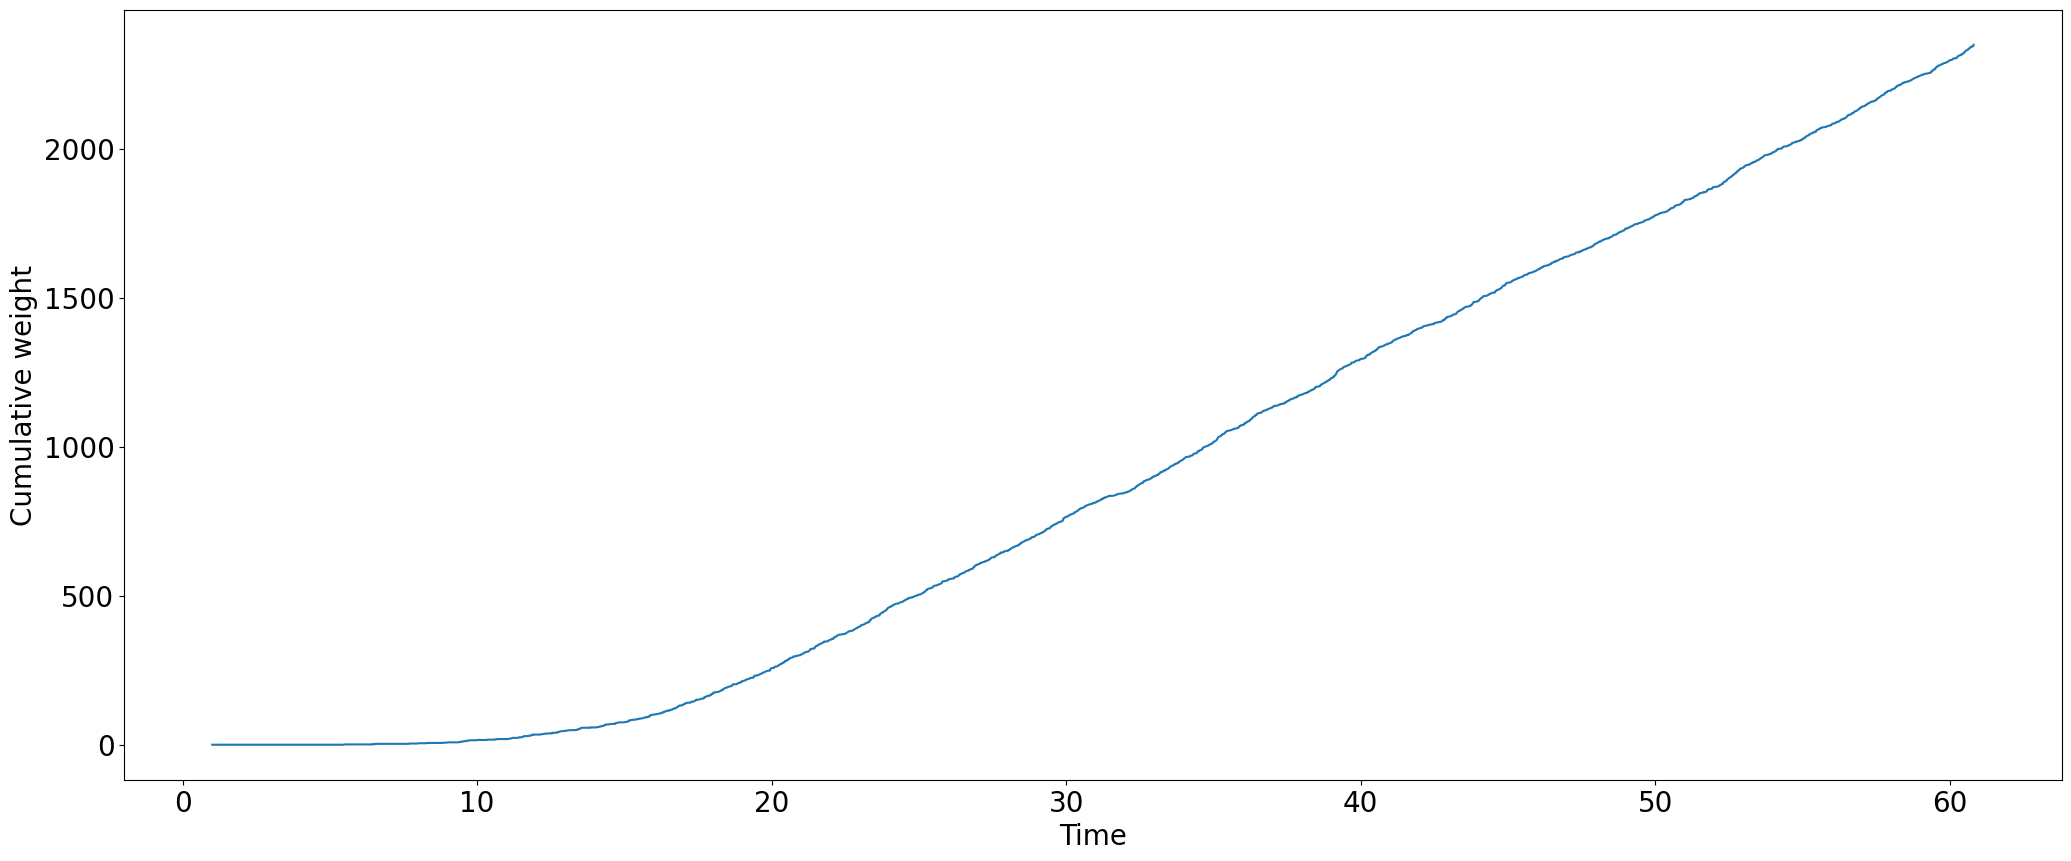

In [5]:
plt.figure(figsize=(25, 10))
t = Tangle(rate=50, alpha=0.0001, tip_selection='mcmc')

cw_200 = []

for i in range(3000):
    t.next_transaction()

    if i > 200:
        cw_200.append([t.time, t.transactions[200].cumulative_weight()])
    else:
        cw_200.append([t.time, 0])
        
cw_200 = np.array(cw_200)
plt.plot(cw_200[:, 0], cw_200[:, 1])
plt.xlabel('Time')
plt.ylabel('Cumulative weight')
plt.show()

Plot tip count, URTS, $\lambda = 50$

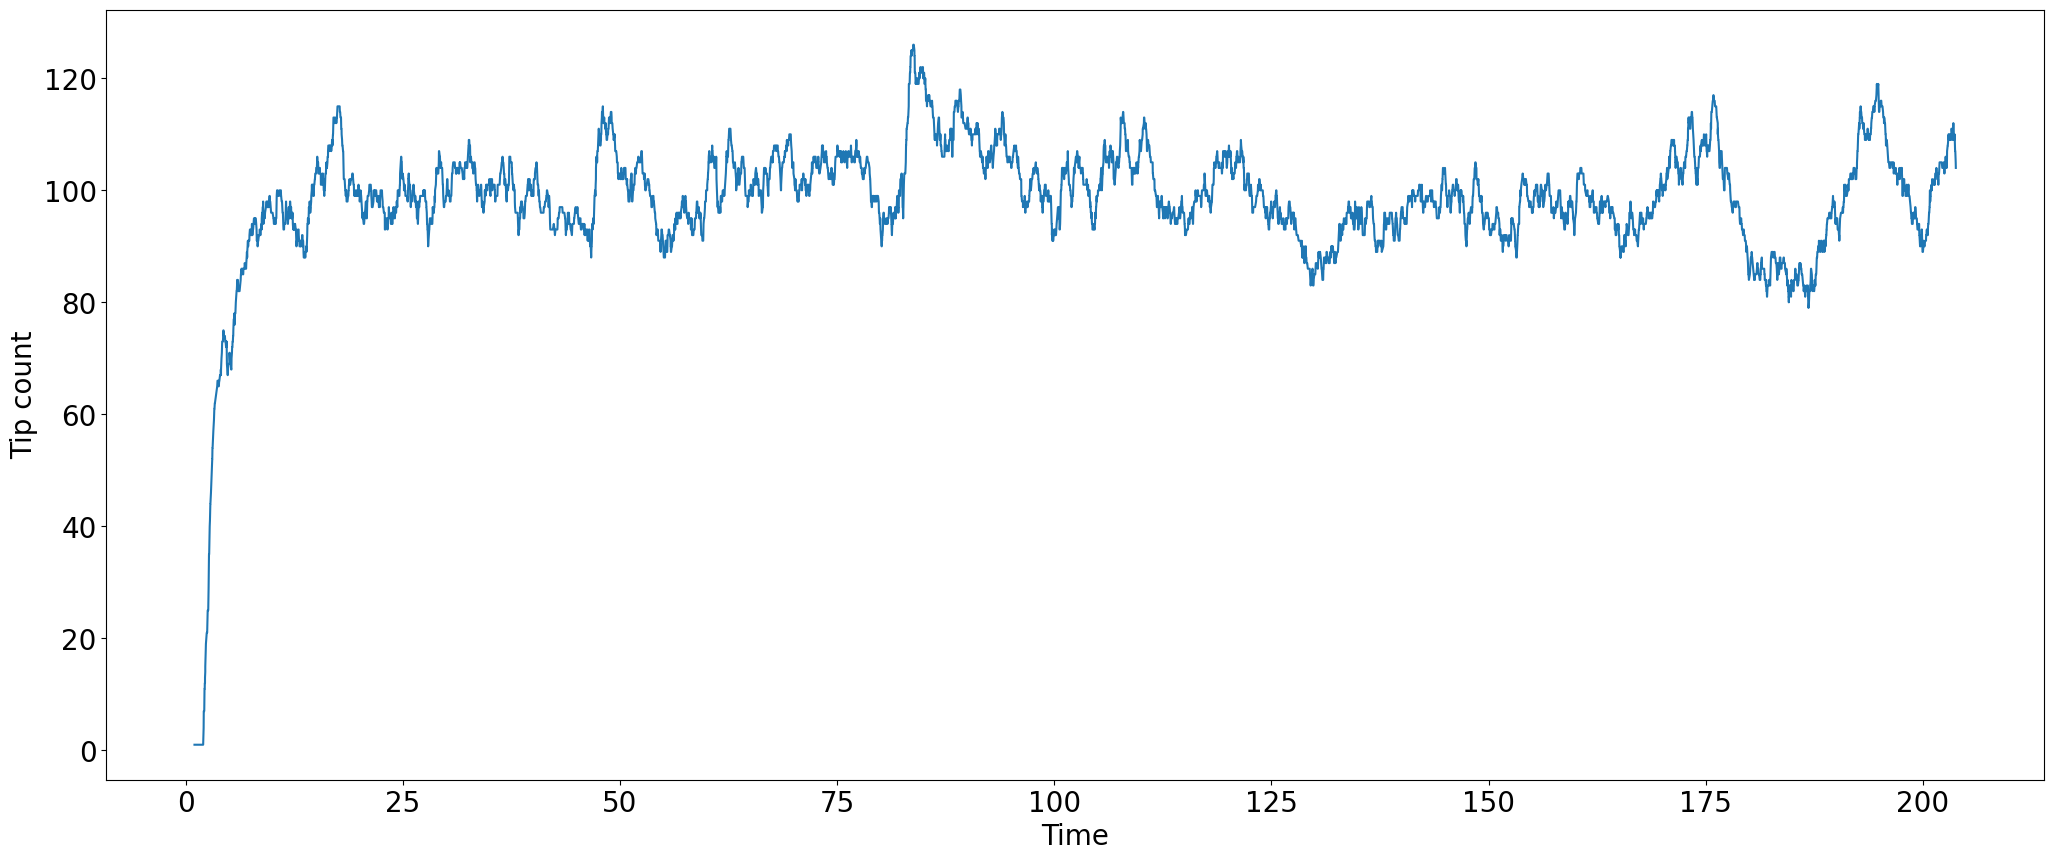

In [6]:
plt.figure(figsize=(25, 10))
t = Tangle(rate=50, tip_selection='urts')

tip_count = []

for i in range(10000):
    t.next_transaction()
    tip_count.append([t.time, len(t.tips())])
        
tip_count = np.array(tip_count)
plt.plot(tip_count[:, 0], tip_count[:, 1])
plt.xlabel('Time')
plt.ylabel('Tip count')
plt.show()

Plot tip count, MCMC, $\lambda = 50, \alpha = 0.0001$

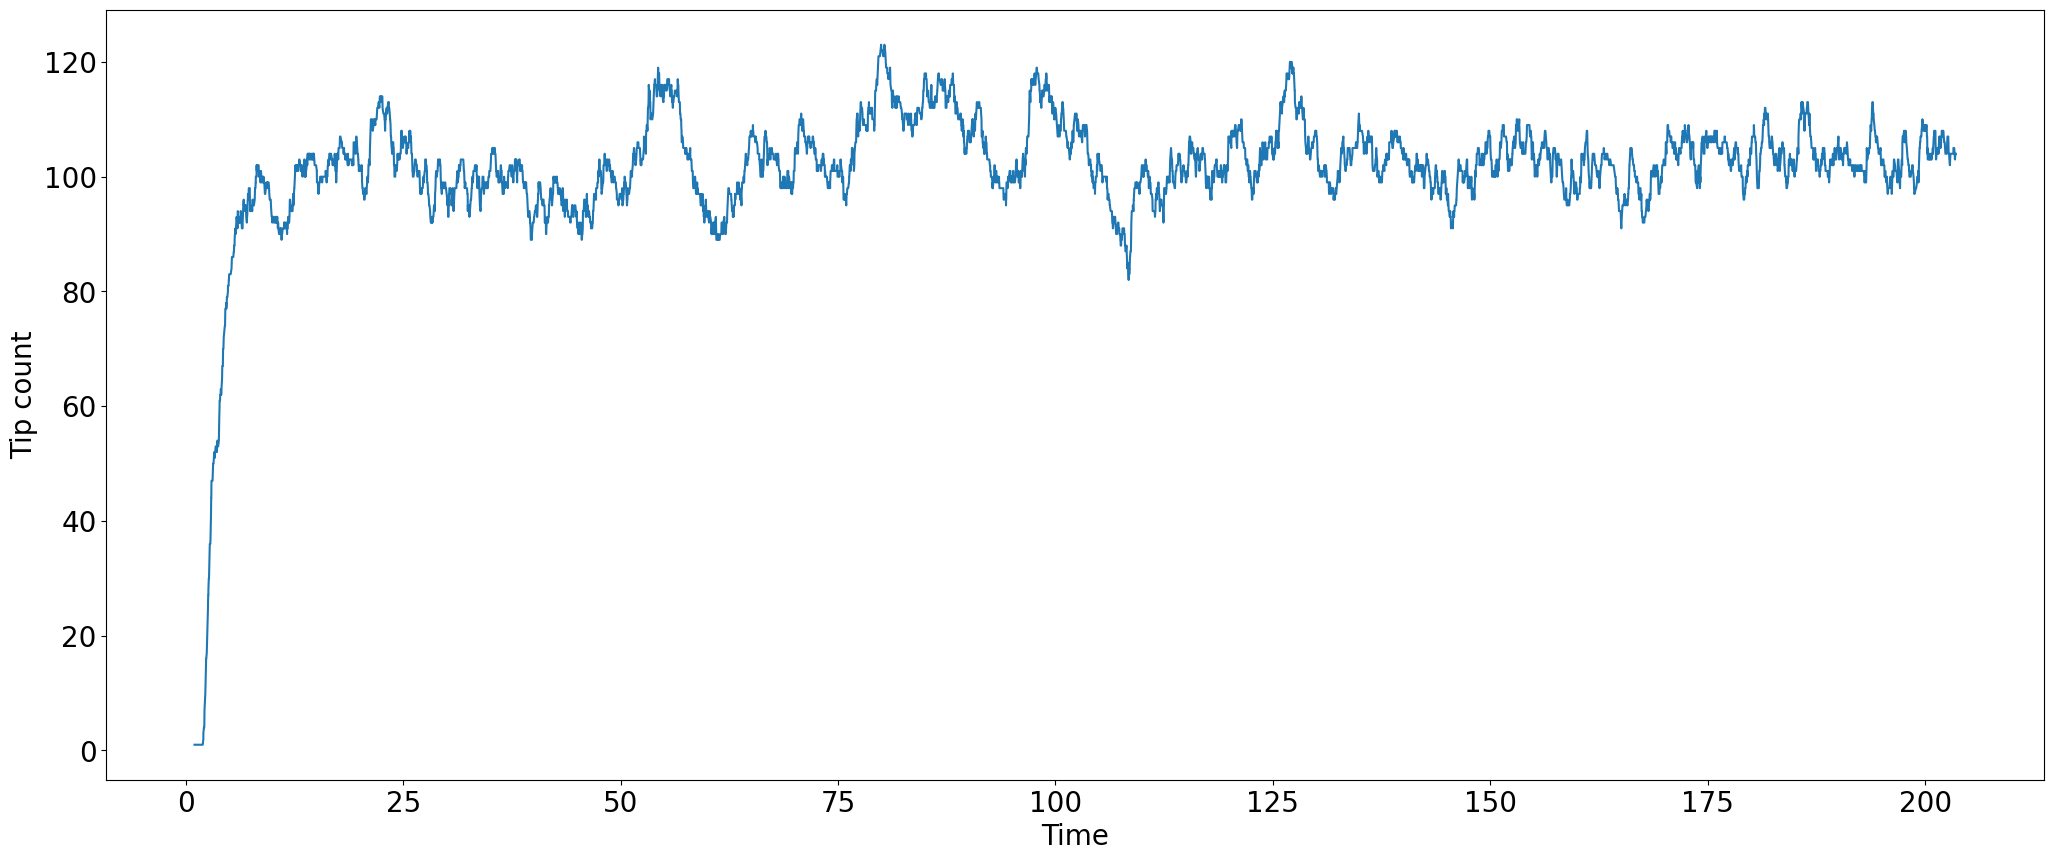

In [7]:
plt.figure(figsize=(25, 10))
t = Tangle(rate=50, tip_selection='mcmc', alpha=0.0001)

tip_count = []

for i in range(10000):
    t.next_transaction()
    tip_count.append([t.time, len(t.tips())])
        
tip_count = np.array(tip_count)
plt.plot(tip_count[:, 0], tip_count[:, 1])
plt.xlabel('Time')
plt.ylabel('Tip count')
plt.show()